# Thyroid Prediction Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

Matplotlib is building the font cache; this may take a moment.


In [2]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    matthews_corrcoef
)

import joblib

sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("thyroid.csv")

In [4]:
df.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [5]:
print(df.shape)

(9172, 31)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [7]:
print(df.describe())

                age          TSH           T3          TT4          T4U  \
count   9172.000000  8330.000000  6568.000000  8730.000000  8363.000000   
mean      73.555822     5.218403     1.970629   108.700305     0.976056   
std     1183.976718    24.184006     0.887579    37.522670     0.200360   
min        1.000000     0.005000     0.050000     2.000000     0.170000   
25%       37.000000     0.460000     1.500000    87.000000     0.860000   
50%       55.000000     1.400000     1.900000   104.000000     0.960000   
75%       68.000000     2.700000     2.300000   126.000000     1.065000   
max    65526.000000   530.000000    18.000000   600.000000     2.330000   

               FTI         TBG    patient_id  
count  8370.000000  349.000000  9.172000e+03  
mean    113.640746   29.870057  8.529473e+08  
std      41.551650   21.080504  7.581969e+06  
min       1.400000    0.100000  8.408010e+08  
25%      93.000000   21.000000  8.504090e+08  
50%     109.000000   26.000000  8.510040e+


--- Missing Values ---
age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64


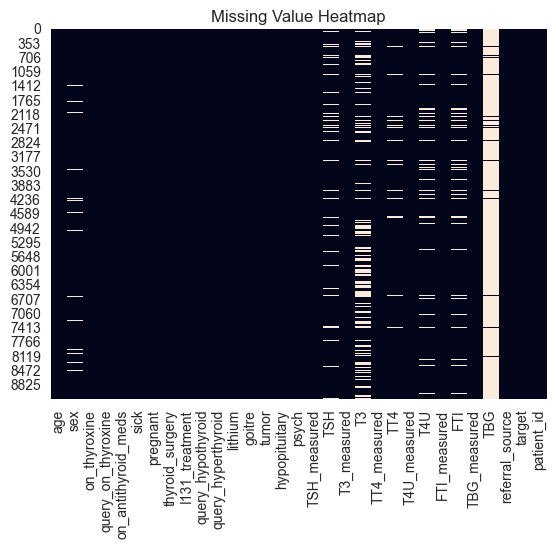

In [8]:
print("\n--- Missing Values ---")
print(df.isnull().sum())

plt.figure()
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()


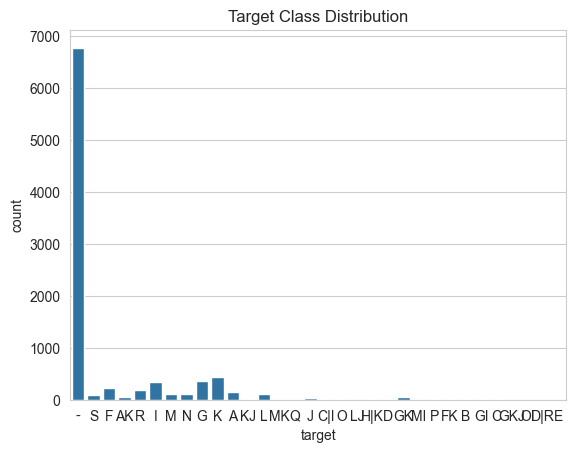


--- Class Distribution (%) ---
target
-      73.822503
K       4.753598
G       3.914086
I       3.772351
F       2.540340
R       2.136939
A       1.602704
L       1.253816
M       1.210205
N       1.199302
S       0.926734
GK      0.534235
AK      0.501526
J       0.327082
B       0.228958
MK      0.174444
Q       0.152638
O       0.152638
C|I     0.130833
KJ      0.119930
GI      0.109027
H|K     0.087222
D       0.087222
FK      0.065416
C       0.065416
P       0.054514
MI      0.021805
LJ      0.010903
GKJ     0.010903
OI      0.010903
D|R     0.010903
E       0.010903
Name: proportion, dtype: float64


In [12]:
plt.figure()
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")
plt.show()

print("\n--- Class Distribution (%) ---")
print(df['target'].value_counts(normalize=True) * 100)

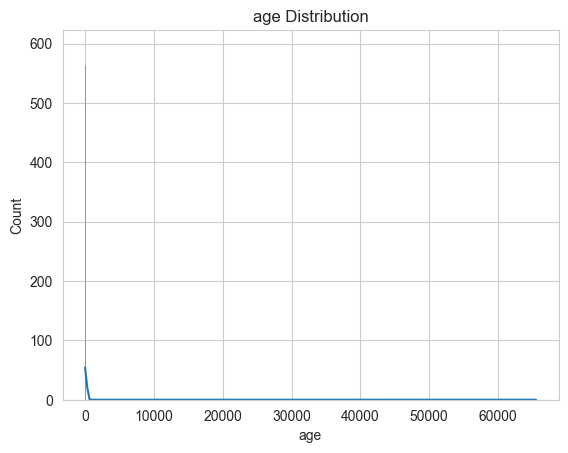

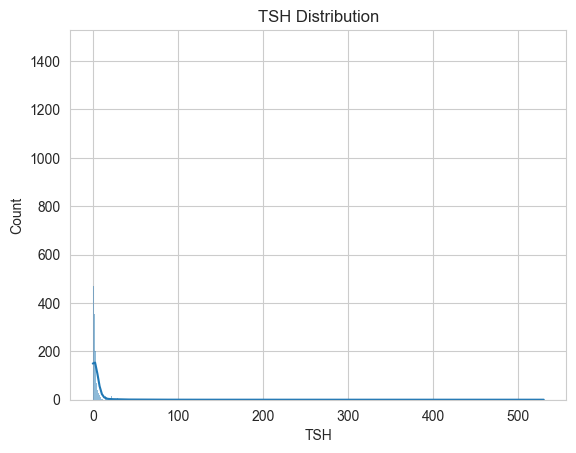

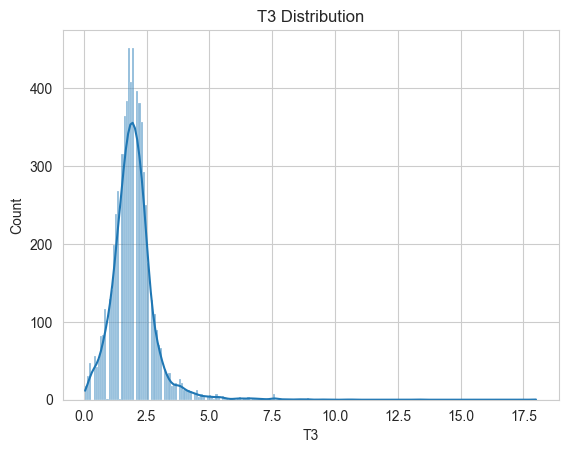

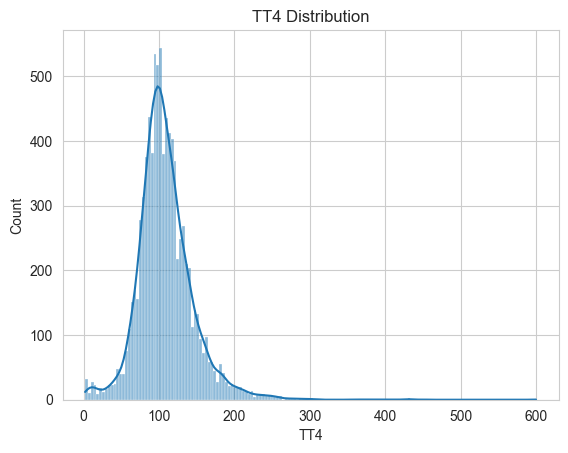

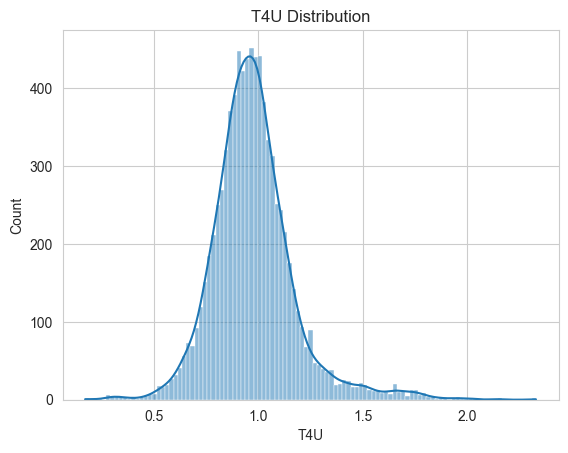

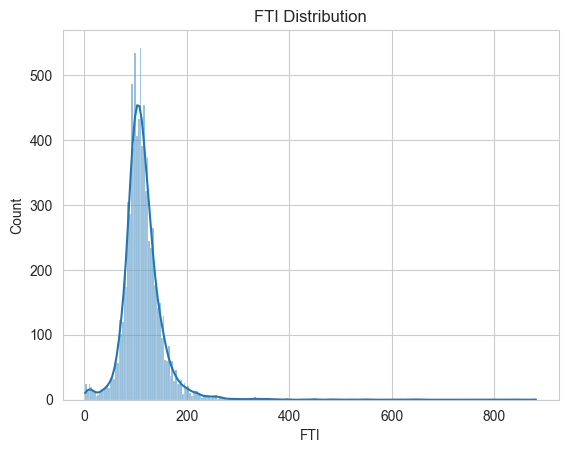

In [13]:
features_to_plot = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

for feature in features_to_plot:
    plt.figure()
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} Distribution")
    plt.show()

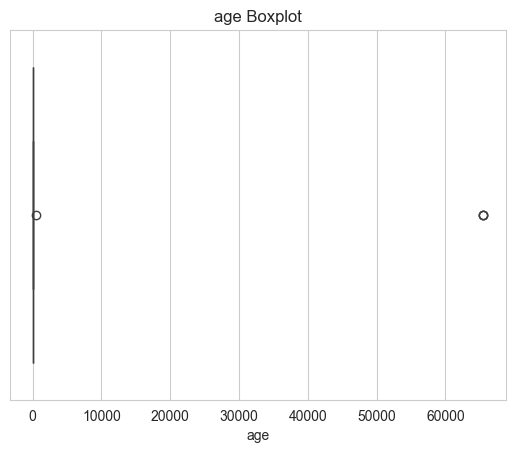

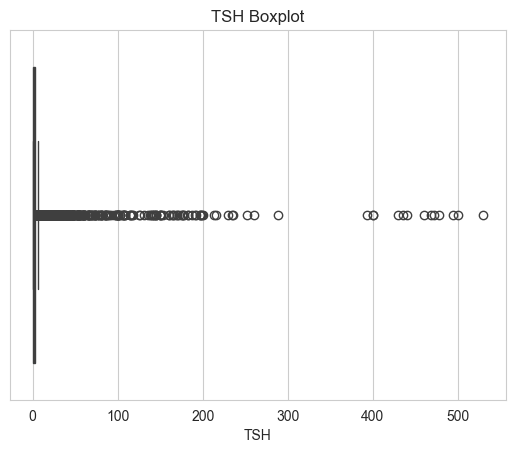

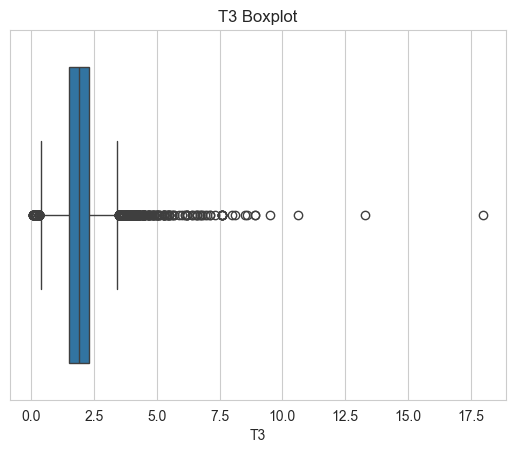

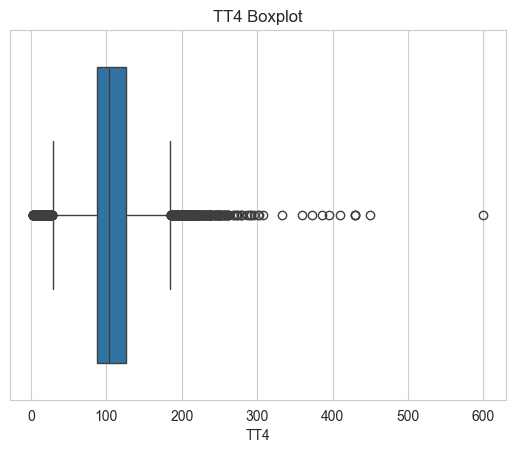

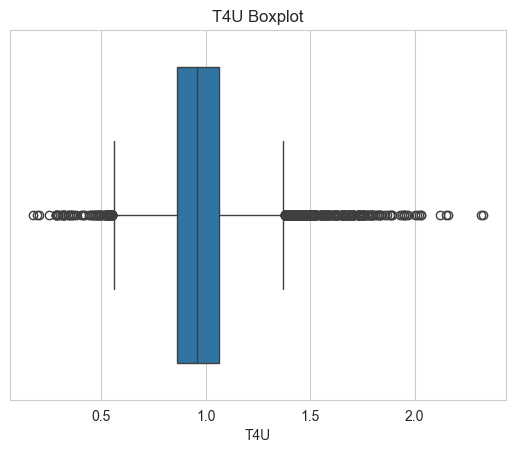

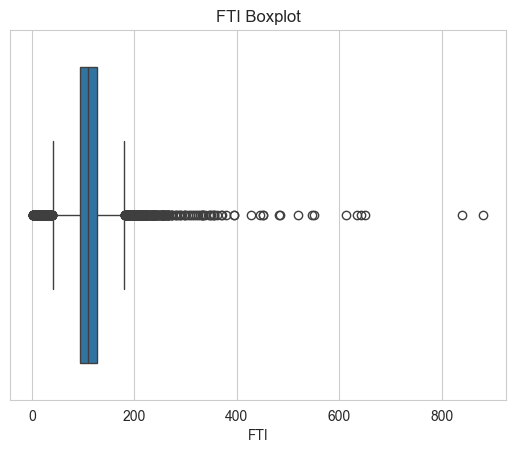

In [14]:
for feature in features_to_plot:
    plt.figure()
    sns.boxplot(x=df[feature])
    plt.title(f"{feature} Boxplot")
    plt.show()

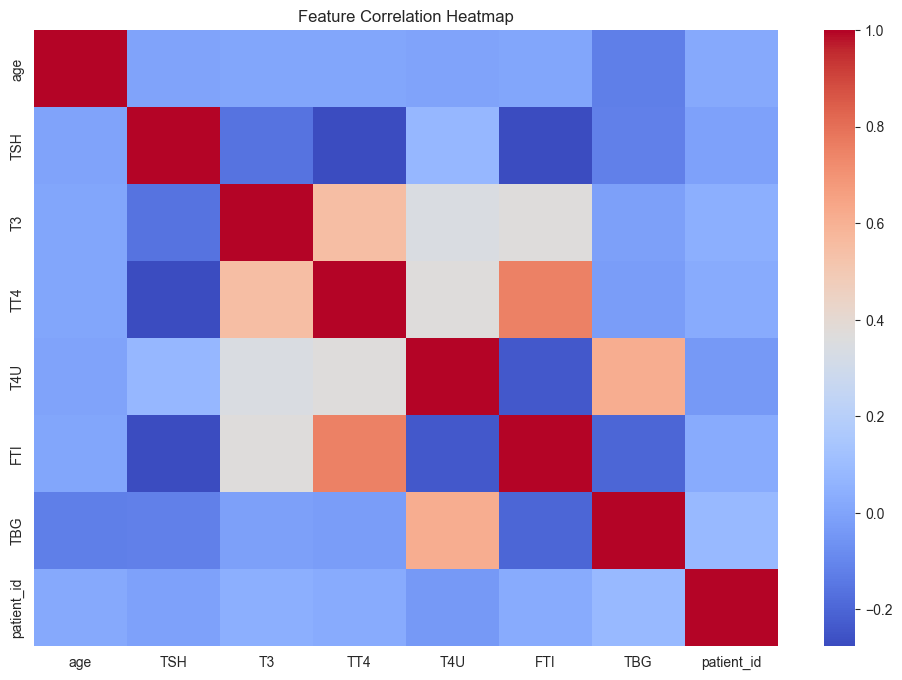

In [16]:
plt.figure(figsize=(12, 8))

numeric_df = df.select_dtypes(include=[np.number])

sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)

plt.title("Feature Correlation Heatmap")
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le_dict = {}

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    le_dict[col] = le

# Select 13 Features (UI-compatible)
X = df_encoded[[
    'age', 'sex', 'on_thyroxine', 'pregnant', 'sick',
    'goitre', 'tumor', 'TSH', 'T3',
    'TT4', 'T4U', 'FTI', 'referral_source'
]]

y = df_encoded['target']

# Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nPreprocessing Completed ✅")



Preprocessing Completed ✅


In [19]:
print(df['target'].value_counts())


target
0     6771
18     436
11     359
16     346
9      233
30     196
1      147
20     115
22     111
25     110
31      85
13      49
2       46
17      30
3       21
24      16
29      14
26      14
5       12
19      11
12      10
15       8
6        8
10       6
4        6
28       5
23       2
21       1
14       1
27       1
7        1
8        1
Name: count, dtype: int64


In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')
}

# ==========================================
# STEP 11: Evaluation Function
# ==========================================
def evaluate_model(name, model, Xtr, Xte):
    model.fit(Xtr, y_train)
    y_pred = model.predict(Xte)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_test, y_pred)

    try:
        y_proba = model.predict_proba(Xte)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    except:
        auc = "N/A"

    return [name, accuracy, auc, precision, recall, f1, mcc]

# ==========================================
# STEP 12: Train & Evaluate Models
# ==========================================
results = []

for name, model in models.items():
    if name in ["Logistic Regression", "KNN", "Naive Bayes"]:
        results.append(evaluate_model(name, model, X_train_scaled, X_test_scaled))
    else:
        results.append(evaluate_model(name, model, X_train, X_test))

# Results Table
results_df = pd.DataFrame(results, columns=[
    "Model", "Accuracy", "AUC",
    "Precision", "Recall", "F1 Score", "MCC"
])

print("\n--- Model Performance Comparison ---")
print(results_df)


/Users/purushottampandey/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/purushottampandey/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/purushottampandey/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.ca


--- Model Performance Comparison ---
                 Model  Accuracy  AUC  Precision    Recall  F1 Score       MCC
0  Logistic Regression  0.837209  N/A   0.803454  0.837209  0.809794  0.599739
1        Decision Tree  0.916424  N/A   0.911290  0.916424  0.912891  0.813686
2                  KNN  0.830669  N/A   0.813023  0.830669  0.806895  0.582898
3          Naive Bayes  0.049782  N/A   0.796471  0.049782  0.032966  0.072249
4        Random Forest  0.919331  N/A   0.907880  0.919331  0.911529  0.819904
5              XGBoost  0.920422  N/A   0.909406  0.920422  0.913569  0.821942


/Users/purushottampandey/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
# Save Model & Encoders
joblib.dump(final_model, "thyroid_rf_model.pkl")
joblib.dump(le, "label_encoder.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\nFinal Model Saved Successfully ✅")


Final Model Saved Successfully ✅
